In [1]:
%matplotlib inline

from datetime import datetime as dt
import pickle

import pandas as pd

In [2]:
nrg_bom_df = pd.read_csv('./nrg_bom_df.p')

#### Look at whether there is monthly seasonality in unaided intent.

In [3]:
def get_year_month(date_str):
    date = dt.strptime(date_str, '%Y-%m-%d')
    return date.year, date.month

nrg_bom_df[['year', 'month']] = pd.DataFrame(list(map(get_year_month, nrg_bom_df.release_date)))

In [4]:
unaided_intent_df = nrg_bom_df.loc[:, ['month', 'unaided_intent']]
aggregated_df = unaided_intent_df.groupby('month', as_index=False).mean()

aggregated_df

,month,unaided_intent
0,1,0.818182
1,2,1.090909
2,3,2.305556
3,4,0.661111
4,5,3.536458
5,6,2.069021
6,7,1.933518
7,8,1.169024
8,10,1.500000
9,11,1.089286


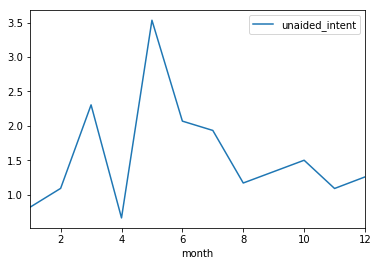

In [5]:
aggregated_df.plot(x='month', y='unaided_intent')

#### Look at whether there is monthly seasonality in box office open gross.

In [6]:
bom_df = pd.read_csv('./bom_all.csv')

In [7]:
def get_month(date_str):
    date = dt.strptime(date_str, '%Y-%m-%d')
    return date.month

bom_df['month'] = bom_df.release_date.apply(get_month)

bo_open_df = bom_df.loc[:, ['year', 'month', 'opening_weekend_gross']]

bo_open_df = bo_open_df.loc[
    bo_open_df.year >= 2005
]

bo_open_df = bo_open_df.groupby(['year', 'month'], as_index=False).mean()

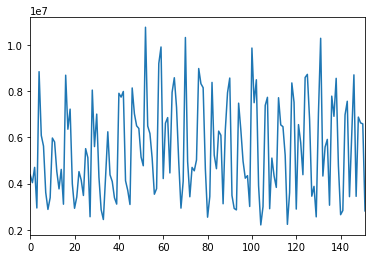

In [8]:
bo_open_df.opening_weekend_gross.plot()

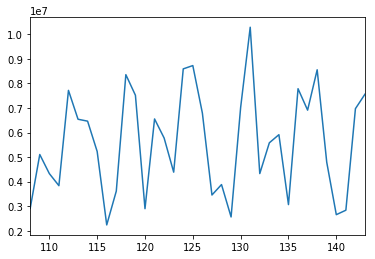

In [9]:
bo_open_df.loc[
    bo_open_df.year.isin([2014, 2015, 2016])
].opening_weekend_gross.plot()

#### Look at weekly seasonality.

In [10]:
def get_week(date_str):
    date = dt.strptime(date_str, '%Y-%m-%d')
    week = date.date().isocalendar()[1]
    return week

bom_df['week'] = bom_df.release_date.apply(get_week)

bo_open_df = bom_df.loc[:, ['year', 'week', 'opening_weekend_gross']]

bo_open_df = bo_open_df.loc[
    bo_open_df.year >= 2005
]

bo_open_df = bo_open_df.groupby(['year', 'week'], as_index=False).mean()

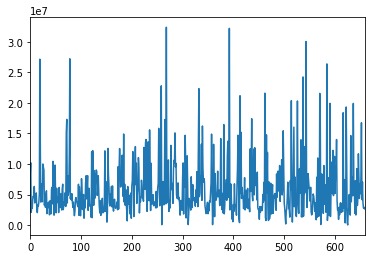

In [11]:
bo_open_df.opening_weekend_gross.plot()

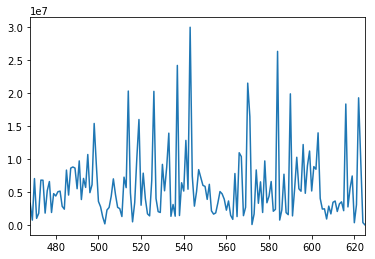

In [12]:
bo_open_df.loc[
    bo_open_df.year.isin([2014, 2015, 2016])
].opening_weekend_gross.plot()

In [14]:
bo_open_ts_df = bom_df.loc[:, ['opening_weekend_gross', 'year', 'month', 'week']]
bo_open_ts_df.sort_values(['year', 'week'], inplace=True)

In [22]:
bo_open_ts_df.to_csv('./bo_open_ts.csv', index=False)